### Notebook used for calculating and plotting metrics for weak and strong scalability experiments

In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [3]:
# Load strong scalability results
strong_df = pd.read_csv("strong_scalability.csv")

# Calculate speedup and efficiency and add to csv

strong_df["aggregation_speedup"] = strong_df.loc[strong_df["num_of_workers"] == 1, "aggregation_time"].values[0] / strong_df["aggregation_time"]
strong_df["total_time_speedup"] = strong_df.loc[strong_df["num_of_workers"] == 1, "total_time"].values[0] / strong_df["total_time"] 

strong_df["aggregation_efficiency"] = strong_df["aggregation_speedup"] / strong_df["num_of_workers"]
strong_df["total_time_efficiency"] = strong_df["total_time_speedup"] / strong_df["num_of_workers"]

strong_df

,aggregation_time,total_time,num_of_workers,aggregation_speedup,total_time_speedup,aggregation_efficiency,total_time_efficiency
0,8.227178,25.750222,3,3.673126,4.007464,1.224375,1.335821
1,18.778618,91.310503,2,1.609249,1.130134,0.804624,0.565067
2,30.219465,103.193084,1,1.000000,1.000000,1.000000,1.000000


In [14]:
# Write to csv

strong_df.to_csv("strong_scalability.csv", index=False)

In [4]:
# Load weak scalability results

weak_df = pd.read_csv("weak_scalability.csv")
# speedup and efficiency
weak_df["aggregation_speedup"] = weak_df.loc[weak_df["num_of_workers"] == 1, "aggregation_time"].values[0] / weak_df["aggregation_time"]
weak_df["total_time_speedup"] = weak_df.loc[weak_df["num_of_workers"] == 1, "total_time"].values[0] / weak_df["total_time"] 

weak_df["aggregation_efficiency"] = weak_df["aggregation_speedup"] / weak_df["num_of_workers"]
weak_df["total_time_efficiency"] = weak_df["total_time_speedup"] / weak_df["num_of_workers"]

weak_df

,aggregation_time,total_time,num_of_workers,fraction_of_data,aggregation_speedup,total_time_speedup,aggregation_efficiency,total_time_efficiency
0,12.321723,30.525002,3,1.000000,0.832685,1.715968,0.277562,0.571989
1,14.487127,42.059543,2,0.666667,0.708223,1.245376,0.354111,0.622688
2,10.260110,52.379936,1,0.333333,1.000000,1.000000,1.000000,1.000000


In [18]:
# Write to csv
weak_df.to_csv("weak_scalability.csv", index=False)

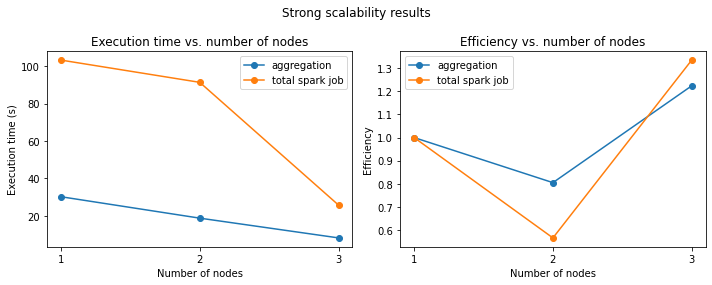

In [5]:
# Plotting strong scalability results. Execution time and efficiency
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
fig.suptitle("Strong scalability results")

# Subplot for execution time for aggregation time and total time vs number of nodes
axes[0].plot(strong_df["num_of_workers"], strong_df["aggregation_time"], label = "aggregation", marker='o');
axes[0].plot(strong_df["num_of_workers"], strong_df["total_time"], label = "total spark job", marker='o');
axes[0].set_xlabel("Number of nodes");
axes[0].set_ylabel("Execution time (s)");
axes[0].set_title("Execution time vs. number of nodes")
axes[0].legend()

# Subplot for aggregation and total job efficiency vs number of nodes
axes[1].plot(strong_df["num_of_workers"], strong_df["aggregation_efficiency"], label = "aggregation", marker = 'o')
axes[1].plot(strong_df["num_of_workers"], strong_df["total_time_efficiency"], label = "total spark job", marker = 'o')
axes[1].set_xlabel("Number of nodes")
axes[1].set_ylabel("Efficiency")
axes[1].set_title("Efficiency vs. number of nodes")
axes[1].legend()

plt.tight_layout()
plt.xticks(range(1,4))
plt.show()

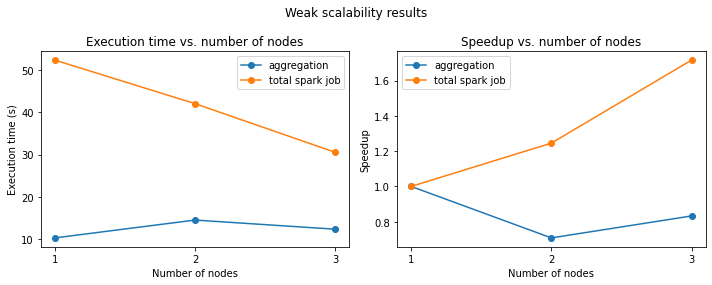

In [6]:
# Plots for weak scalability results
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
fig.suptitle("Weak scalability results")

# Subplots for execution time vs number of nodes
axes[0].plot(weak_df["num_of_workers"], weak_df["aggregation_time"], label = "aggregation", marker = 'o');
axes[0].plot(weak_df["num_of_workers"], weak_df["total_time"], label = "total spark job", marker = 'o');
axes[0].set_xlabel("Number of nodes");
axes[0].set_ylabel("Execution time (s)");
axes[0].set_title("Execution time vs. number of nodes")
axes[0].legend()

# Subplots for speedup vs number of nodes
axes[1].plot(weak_df["num_of_workers"], weak_df["aggregation_speedup"], label = "aggregation", marker = 'o')
axes[1].plot(weak_df["num_of_workers"], weak_df["total_time_speedup"], label = "total spark job", marker = 'o')
axes[1].set_xlabel("Number of nodes")
axes[1].set_ylabel("Speedup")
axes[1].set_title("Speedup vs. number of nodes")
axes[1].legend()

plt.tight_layout()
plt.xticks(range(1,4))
plt.show()